In [82]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('data/cleanned_trips_2020_Q1.csv')

df.head(4)

,ride_id,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,duration_seconds,starting_month,starting_hour,starting_date
0,EB83072244DF5183,Clark St & Drummond Pl,220,Millennium Park,90.0,41.9312,-87.6443,41.8810,-87.6241,casual,86155.0,2,11,Wednesday
1,1924EA914F6FC007,Federal St & Polk St,41,Field Blvd & South Water St,7.0,41.8721,-87.6295,41.8863,-87.6175,casual,85990.0,3,18,Friday
2,EB48B0C5B8A7E284,Dearborn St & Monroe St,49,Michigan Ave & 14th St,168.0,41.8813,-87.6295,41.8641,-87.6237,member,85928.0,2,17,Friday
3,D77022E99184DCFC,Michigan Ave & Pearson St,25,Wabash Ave & Grand Ave,199.0,41.8977,-87.6235,41.8915,-87.6268,casual,85684.0,1,10,Wednesday


1-) Here I will create some tables and graphs to analyze the data and I'll export them to deliver the key concepts on Tableau

In [83]:
users_count = df.groupby('member_casual')[['duration_seconds']].count()
users_count

,duration_seconds
member_casual,
casual,44302
member,374624


In [84]:
users_count_2019 = pd.read_csv('pivot_tables/users_count_2019.csv')
users_count_2019.set_index('usertype')

transform_user_types = {'Customer': 'casual','Subscriber': 'member' }
users_count_2019['usertype'] =  users_count_2019['usertype'].replace(transform_user_types)

users_count_2019.rename(columns={'usertype': 'member_casual'}, inplace=True)
users_count_2019.set_index('member_casual', inplace=True)

In [85]:
number_users_comparation = users_count.merge(users_count_2019, on='member_casual')
number_users_comparation

,duration_seconds,tripduration
member_casual,,
casual,44302,23163
member,374624,341906


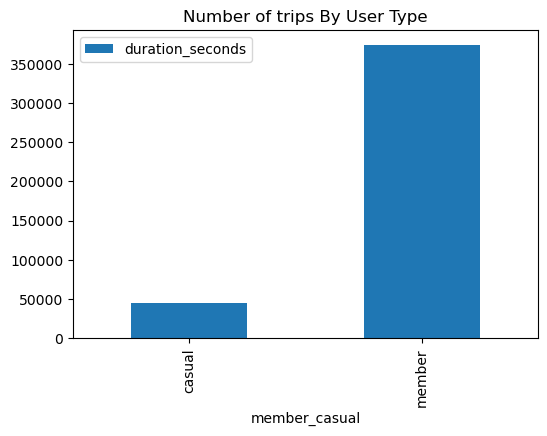

In [86]:
users_count.plot(kind='bar', figsize=(6,4))
plt.title('Number of trips By User Type')
plt.show()

In [87]:
duration_pv_median = df.groupby('member_casual')[['duration_seconds']].median()
duration_pv_median

,duration_seconds
member_casual,
casual,1388.0
member,519.0


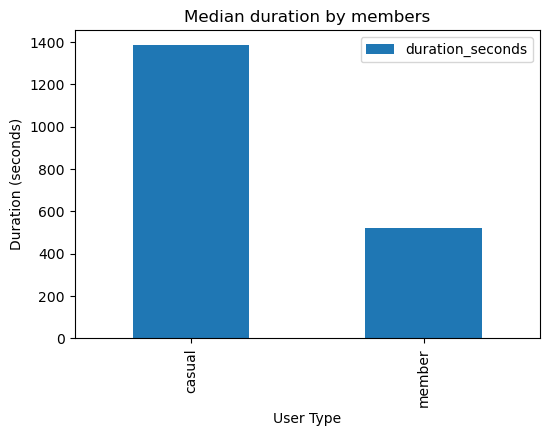

In [88]:
duration_pv_median.plot(kind='bar', figsize=(6,4), title='Median duration by members', xlabel='User Type', ylabel='Duration (seconds)')
plt.show()

2-) Now it's time to analyze the data days

In [89]:
#Crear una pivot table o group by con los dias de la semana y el typo de usuario haciendo un cont
starting_date_pv = df.pivot_table(index='starting_date',values='duration_seconds', columns='member_casual', aggfunc='count')
order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
starting_date_pv = starting_date_pv.reindex(order)
starting_date_pv

member_casual,casual,member
starting_date,,
Monday,3671,61359
Tuesday,4542,69109
Wednesday,5141,63392
Thursday,4175,60606
Friday,4591,54933
Saturday,7428,29747
Sunday,14754,35478


In [90]:
pivot_pct = starting_date_pv.div(starting_date_pv.sum()) * 100
pivot_pct.round(2)

member_casual,casual,member
starting_date,,
Monday,8.29,16.38
Tuesday,10.25,18.45
Wednesday,11.60,16.92
Thursday,9.42,16.18
Friday,10.36,14.66
Saturday,16.77,7.94
Sunday,33.30,9.47


In [91]:
starting_merged = starting_date_pv.merge(pivot_pct, on='starting_date')
starting_merged.rename(columns={'casual_y':'casual_pct'}, inplace=True)
starting_merged.rename(columns={'member_y':'member_pct'}, inplace=True)
starting_merged.rename(columns={'casual_x':'casual_abs'}, inplace=True)
starting_merged.rename(columns={'member_x':'member_abs'}, inplace=True)
starting_merged

member_casual,casual_abs,member_abs,casual_pct,member_pct
starting_date,,,,
Monday,3671,61359,8.286308,16.378822
Tuesday,4542,69109,10.252359,18.447563
Wednesday,5141,63392,11.604442,16.921500
Thursday,4175,60606,9.423954,16.177821
Friday,4591,54933,10.362963,14.663503
Saturday,7428,29747,16.766737,7.940495
Sunday,14754,35478,33.303237,9.470296


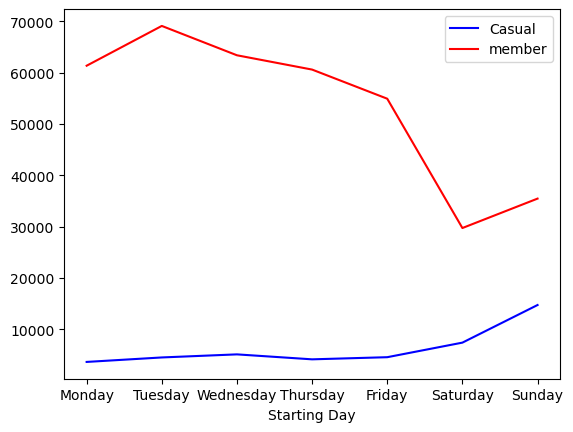

In [92]:
plt.plot(starting_date_pv.index,starting_date_pv['casual'], label='Casual', color='blue')
plt.plot(starting_date_pv.index,starting_date_pv['member'], label='member', color='red')

plt.legend()
plt.xlabel('Starting Day')
plt.show()

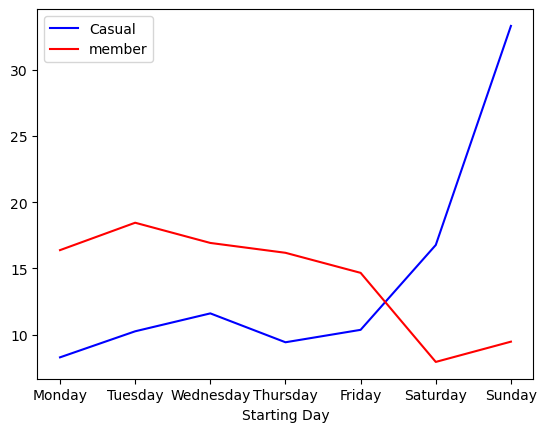

In [93]:
plt.plot(pivot_pct.index,pivot_pct['casual'], label='Casual', color='blue')
plt.plot(pivot_pct.index,pivot_pct['member'], label='member', color='red')

plt.legend()
plt.xlabel('Starting Day')
plt.show()

In [94]:
#Crear un pivot table con la hora del dia a la que cojen la bici por tipo de usuario
starting_hours_pv = df.pivot_table(index='starting_hour',  values='duration_seconds' ,columns='member_casual', aggfunc='count')
starting_hours_pv = starting_hours_pv.div(starting_hours_pv.sum()) * 100
starting_hours_pv.round(2)

member_casual,casual,member
starting_hour,,
0,0.70,0.37
1,0.50,0.22
2,0.30,0.14
3,0.23,0.10
4,0.12,0.27
5,0.30,1.37
6,0.74,3.94
7,1.63,8.39
8,2.63,10.97


<Axes: xlabel='starting_hour'>

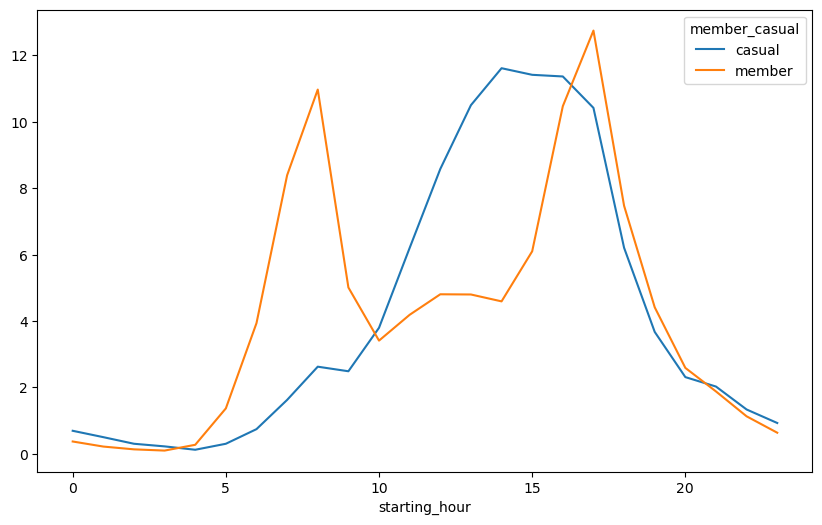

In [95]:
starting_hours_pv.plot(kind='line', figsize=(10,6))

3-) It's time to analyze the data by zones

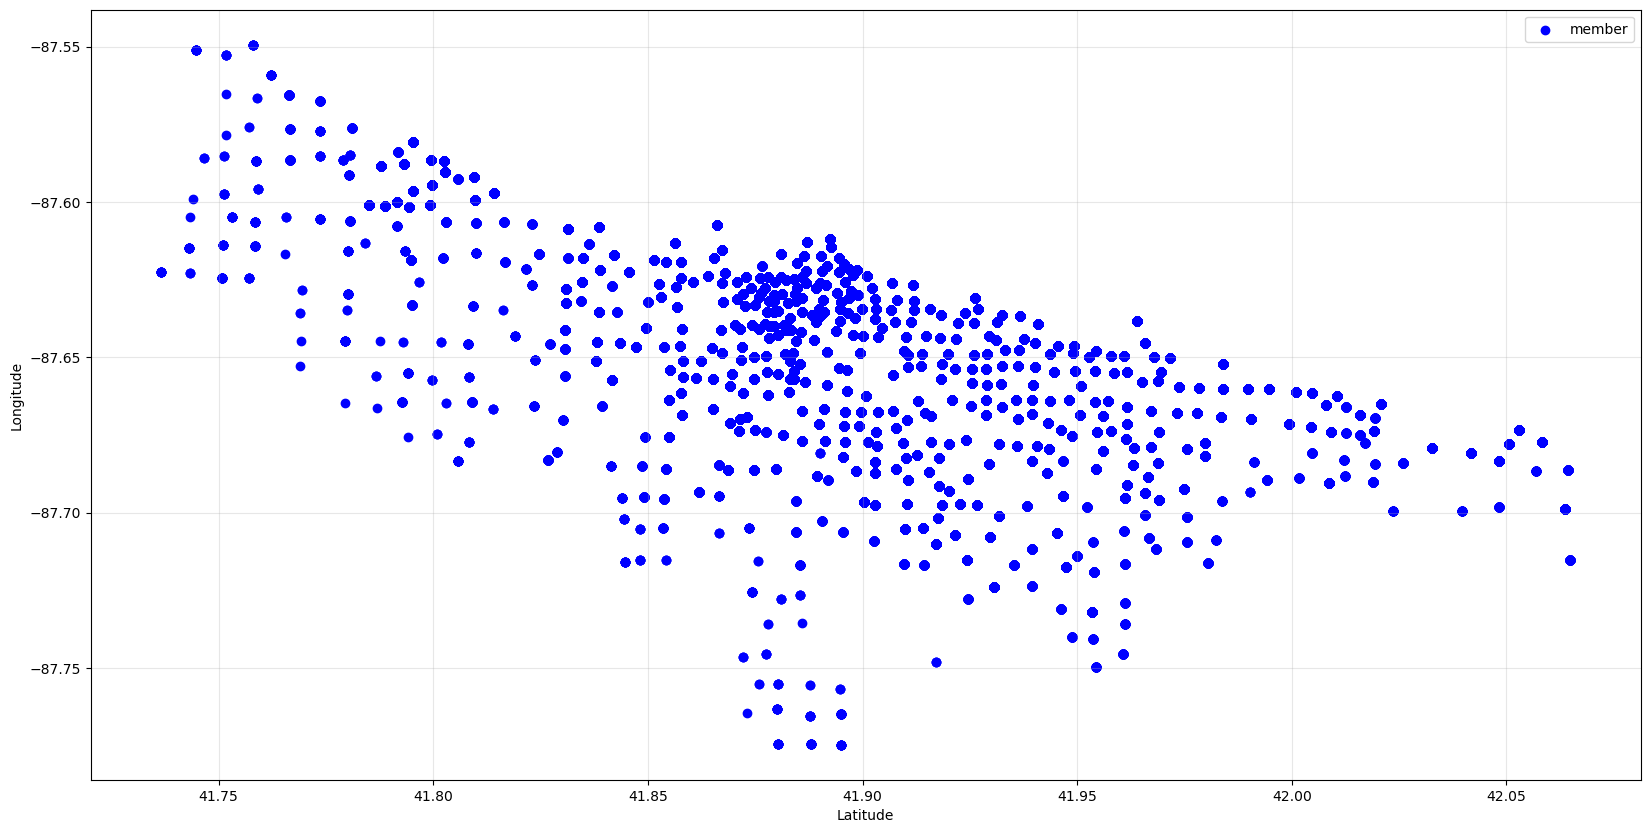

In [96]:
plt.figure(figsize=(20,10))
plt.scatter(df[df['member_casual'] == 'member']['start_lat'], df[df['member_casual'] == 'member']['start_lng'], color='blue', label='member')
""" plt.scatter(df[df['member_casual'] == 'casual']['start_lat'], df[df['member_casual'] == 'casual']['start_lng'], color='red', label='casual') """

plt.xlabel('Latitude')
plt.ylabel('Longitude')

plt.grid(True, alpha=0.3)

plt.legend()
plt.show()

<Axes: xlabel='start_lat', ylabel='start_lng'>

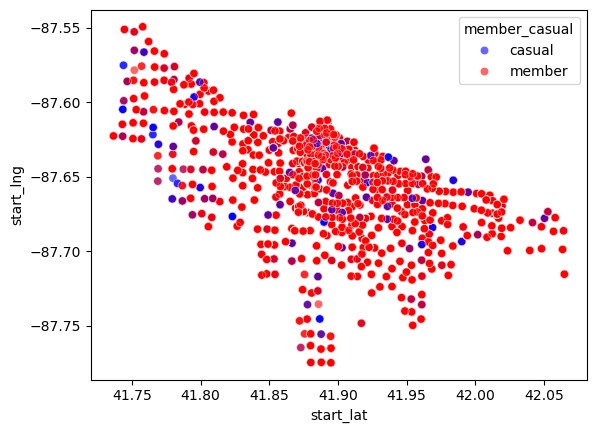

In [97]:
import seaborn as sns
sns.scatterplot(
    data=df,
    x='start_lat',y = 'start_lng',
    hue='member_casual',
    palette={'member':'red', 'casual':'blue'},
    alpha=0.6
)


Finally it's time to export our insights to a csv file.


In [ ]:
""" starting_merged['casual_pct'] = starting_merged['casual_pct'].round(2)
starting_merged['member_pct'] = starting_merged['member_pct'].round(2)

starting_hours_pv['casual'] = starting_hours_pv['casual'].round(2)
starting_hours_pv['member'] = starting_hours_pv['member'].round(2) """
 
number_users_comparation.rename(columns={'duration_seconds':'year_2020','tripduration':'year_2019'}, inplace=True)


In [99]:
number_users_comparation.to_csv('pivot_tables/users_comparation.csv')
duration_pv_median.to_csv('pivot_tables/duration_median.csv')
starting_merged.to_csv('pivot_tables/starting_day.csv', decimal=',')
starting_hours_pv.to_csv('pivot_tables/starting_hours.csv', decimal=',')

Conclusions
  - Members represent the largest volume of usage,confirming they are the most active and frequent riders in the system

  - Casual users consistently take trips with a significantly longer median duration than members

  - Usage patterns strongly align with trip purpose: Casual usage peaks on weekends, suggesting leisure activity, whereas Membership usage dominates during the weekdays, indicative of routine commuting

  - This trend is reinforced by the hourly usage data: Members show distinct rush-hour peaks in the morning and late afternoon, a clear pattern for work-related commuting.

,year_2020,year_2019
member_casual,,
casual,44302,23163
member,374624,341906
